In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import ppgs
import torch
import torchaudio

import promonet

/home/mrm5248/micromamba/envs/promonet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Configuration name
ppgs.CONFIG = 'w2v2fb'

# Network width
ppgs.HIDDEN_CHANNELS = 512

# Dimensionality of input representation
ppgs.INPUT_CHANNELS = 768

# Number of hidden layers
ppgs.NUM_HIDDEN_LAYERS = 5

# Input representation
ppgs.REPRESENTATION = 'w2v2fb'

# Local checkpoint to use
# If None, Huggingface will be used unless a checkpoint is given in the CLI
ppgs.LOCAL_CHECKPOINT = f'/repos/ppgs/runs/w2v2fb/00200000.pt'

### Load audio

In [5]:
# stems = promonet.load.partition('vctk')['valid']
# stem = stems[47]
# promonet.load.text(promonet.CACHE_DIR / 'vctk' / f'{stem}.txt')
audio = promonet.load.audio('/hemera-storage1/pardo/max/test-audio/ill-be-back-denoise.wav')[:, :-int(.17 * promonet.SAMPLE_RATE)]
ipd.Audio(audio, rate=promonet.SAMPLE_RATE)

### Preprocess

In [6]:
# Preprocess
loudness, pitch, periodicity, ppg = promonet.preprocess.from_audio(
    audio,
    features=['ppg', 'pitch', 'periodicity', 'loudness'],
    gpu=0)

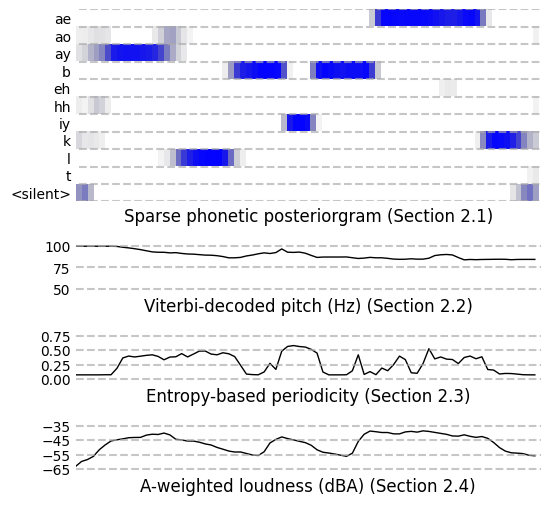

In [7]:
features = ['ppg', 'pitch', 'periodicity', 'loudness']
figure = promonet.plot.from_features(
    audio,
    promonet.loudness.band_average(loudness, 1),
    pitch,
    periodicity,
    ppg,
    features=features)
figure.savefig('representation.pdf', bbox_inches='tight', pad_inches=0)
figure.savefig('representation.jpg', bbox_inches='tight', pad_inches=0)

In [8]:
# Save parts
for axis, feature in zip(figure.axes, features):
    extent = axis.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
    figure.savefig(f'{feature}.png', bbox_inches=extent.expanded(1.25, 1.25), transparent=True)